In [10]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 2.7.10 (default, Jul 15 2017, 17:16:57) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]
pandas version: 0.23.3
matplotlib version: 2.2.2
numpy version: 1.14.5
scipy version: 1.1.0
IPython version: 5.7.0
scikit-learn version: 0.19.2


X.shape: (26, 2)


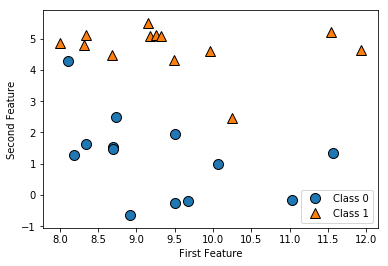

In [11]:
import sklearn

X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

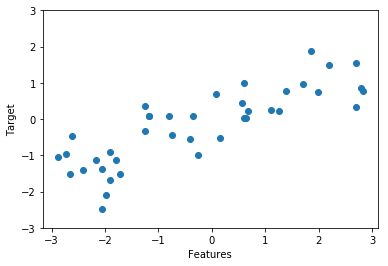

In [14]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Features")
plt.ylabel("Target")

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
['target_names', 'data', 'target', 'DESCR', 'feature_names']


In [16]:
print("shape of breast cancer data: {}".format(cancer.data.shape))

shape of breast cancer data: (569, 30)


In [18]:
print("sample numbers of each class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

sample numbers of each class:
{'benign': 357, 'malignant': 212}


In [19]:
print("Feature name:\n{}".format(cancer.feature_names))

Feature name:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


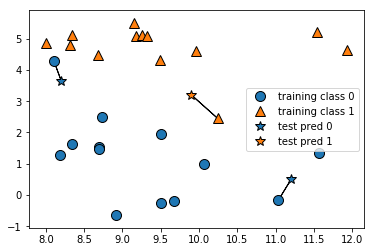

In [21]:
# k-NN algorithm
mglearn.plots.plot_knn_classification(n_neighbors=1)

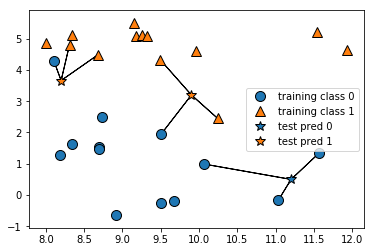

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [26]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')